<img src="https://blog.kakaocdn.net/dn/S2hMq/btrokqPL3FK/DfZFWZCK3TCUichk56jBTk/img.gif">

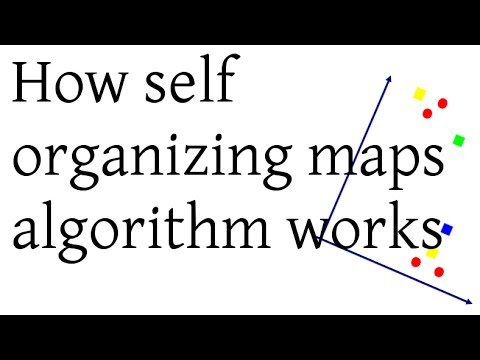

In [1]:
from IPython.display import YouTubeVideo

# Function to display YouTube video in Jupyter notebook
def display_youtube_video(video_id, width=800, height=450):
    return YouTubeVideo(video_id, width=width, height=height)

# Example usage
video_id = 'H9H6s-x-0YE'  # Video ID extracted from the URL
display_youtube_video(video_id)

In [2]:
! pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=66639918d6e6c96b9997a5f53021059677cd3a3dd5ec51e3007fd042523b1ec0
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


## **Iris data**
<img src = 'https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png'>

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from minisom import MiniSom
import matplotlib.pyplot as plt

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터프레임 생성
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# SOM 초기화
som = MiniSom(x=1, y=3, input_len=4, sigma=1.0, learning_rate=0.5)

# SOM 훈련
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

# 결과를 저장할 리스트 초기화
clusters = []

# 각 데이터 포인트에 대해 승자 뉴런을 찾고 클러스터 할당
for i in range(len(X)):
    winner = som.winner(X[i])
    clusters.append(winner)

# 클러스터 결과를 데이터프레임에 추가
df['Cluster'] = [str(cluster) for cluster in clusters]
df

/usr/local/lib/python3.10/dist-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Cluster
0,5.1,3.5,1.4,0.2,0,"(0, 0)"
1,4.9,3.0,1.4,0.2,0,"(0, 0)"
2,4.7,3.2,1.3,0.2,0,"(0, 0)"
3,4.6,3.1,1.5,0.2,0,"(0, 0)"
4,5.0,3.6,1.4,0.2,0,"(0, 0)"
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,"(0, 2)"
146,6.3,2.5,5.0,1.9,2,"(0, 2)"
147,6.5,3.0,5.2,2.0,2,"(0, 2)"
148,6.2,3.4,5.4,2.3,2,"(0, 2)"


In [6]:
df.sample(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Cluster
7,5.0,3.4,1.5,0.2,0,"(0, 0)"
107,7.3,2.9,6.3,1.8,2,"(0, 2)"
140,6.7,3.1,5.6,2.4,2,"(0, 2)"
67,5.8,2.7,4.1,1.0,1,"(0, 2)"
73,6.1,2.8,4.7,1.2,1,"(0, 2)"
103,6.3,2.9,5.6,1.8,2,"(0, 2)"
98,5.1,2.5,3.0,1.1,1,"(0, 1)"
30,4.8,3.1,1.6,0.2,0,"(0, 0)"
131,7.9,3.8,6.4,2.0,2,"(0, 2)"
126,6.2,2.8,4.8,1.8,2,"(0, 2)"


## **국가별 per capita**

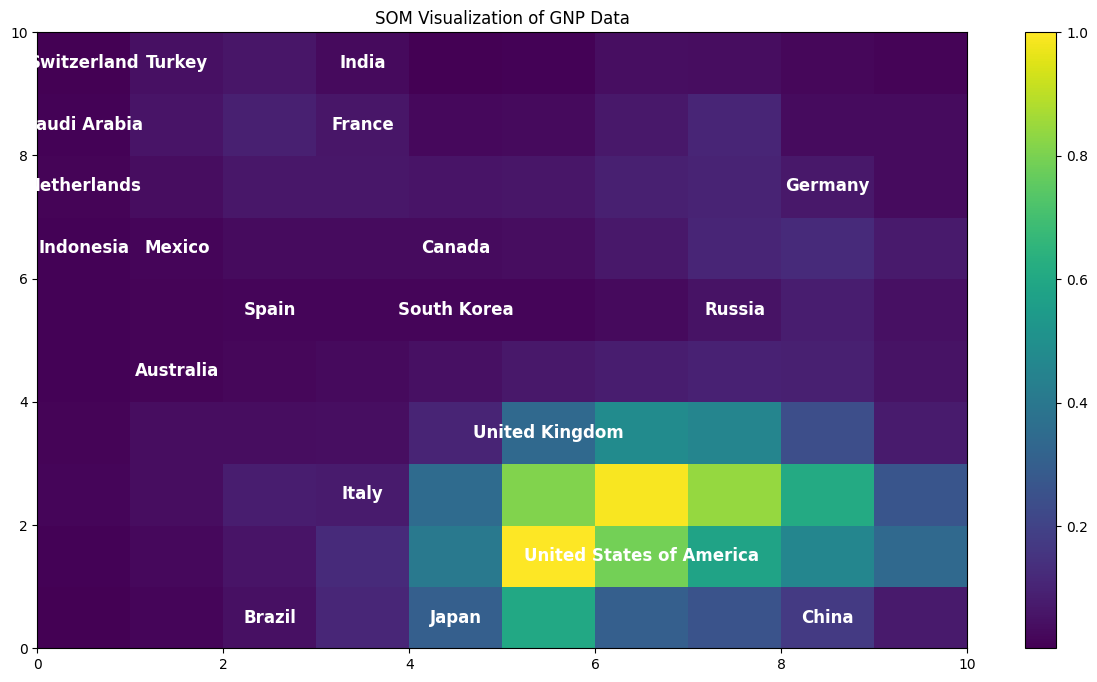

In [ ]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pylab import plot, show, pcolor, colorbar, bone

# 20개 국가의 이름과 임의의 GNP 데이터 생성
countries = ["United States of America", "China", "Japan", "Germany", "India", "United Kingdom", "France", "Brazil", "Italy", "Canada",
             "Russia", "South Korea", "Australia", "Spain", "Mexico", "Indonesia", "Netherlands", "Saudi Arabia", "Turkey", "Switzerland"]

gnp_values = [21439453, 14342903, 5081770, 3845630, 2875142, 2825208, 2715518, 1868113,
              2003576, 1647120, 1577000, 1644800, 1428246, 1402360, 1199260, 1126190,
              910949, 779690, 743520, 715360]

# 데이터 프레임으로 생성
data = pd.DataFrame({
    'Country': countries,
    'GNP': gnp_values
})

# GNP 데이터 정규화
scaler = MinMaxScaler()
gnp_data = scaler.fit_transform(data[['GNP']])

# SOM 초기화
som = MiniSom(x=10, y=10, input_len=1, sigma=1.0, learning_rate=0.5)
som.random_weights_init(gnp_data)

# SOM 학습
som.train_random(gnp_data, 1000)

# SOM 격자의 거리 매트릭스 시각화
plt.figure(figsize=(15, 8))
plt.pcolor(som.distance_map().T, cmap='viridis')
colorbar()

# 데이터 포인트를 SOM 격자에 매핑하여 시각화
for i, x in enumerate(gnp_data):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, countries[i], fontsize=12, ha='center', va='center', color='white', weight='bold')

plt.title('SOM Visualization of GNP Data')
plt.show()



<ipython-input-10-b0f0d31ea823>:23: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


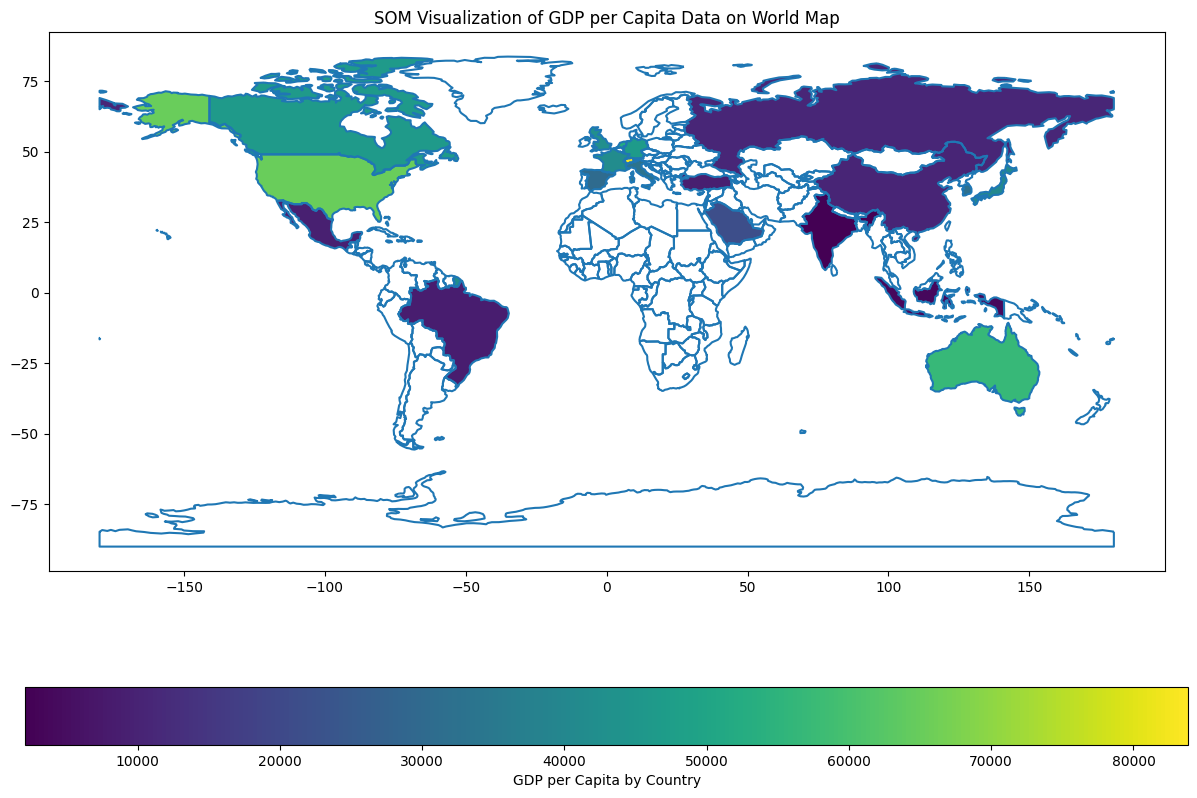

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 20개 국가의 이름과 임의의 1인당 GDP 데이터 생성
countries = ["United States of America", "China", "Japan", "Germany", "India", "United Kingdom", "France", "Brazil", "Italy", "Canada",
             "Russia", "South Korea", "Australia", "Spain", "Mexico", "Indonesia", "Netherlands", "Saudi Arabia", "Turkey", "Switzerland"]

# 1인당 GDP 데이터 (단위: USD)
gdp_per_capita_values = [65112, 10411, 40323, 46599, 2104, 42330, 41463, 8789, 33218, 46307,
                         10743, 31814, 56819, 30427, 9260, 3894, 52346, 21324, 9065, 83832]


# 국가 이름을 소문자로 변환하여 일치시키기
data['Country'] = data['Country'].str.lower()

# Geopandas를 사용하여 세계 지도 불러오기
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Geopandas 데이터프레임과 데이터 병합
world['name'] = world['name'].str.lower()
world = world.merge(data, how="left", left_on="name", right_on="Country")

# 시각화
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='GDP_per_capita', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "GDP per Capita by Country",
                                                                                      'orientation': "horizontal"})
plt.title('SOM Visualization of GDP per Capita Data on World Map')
plt.show()



## 최초 무작위 100개의 데이터를 만들고 격자 SOM을 만들어 학습을 하면
- data는 100개의 3차원 벡터로 구성된 입력 데이터이며, 학습 과정에서 변화하지 않고 SOM의 weight_maps 리스트에는 각 반복마다 SOM의 가중치 상태가 기록되어 학습 과정을 시각화하여 추적

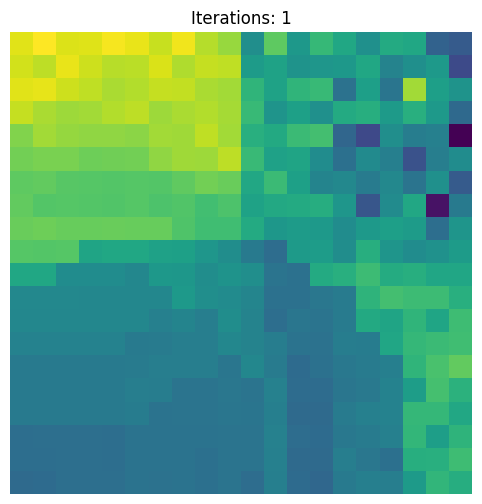

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# SOM 클래스 정의
class SOM:
    def __init__(self, width, height, input_dim):
        self.width = width
        self.height = height
        self.input_dim = input_dim
        self.weights = np.random.rand(height, width, input_dim)
        self.radius = max(width, height) / 2
        self.learning_rate = 0.1

    def find_bmu(self, input_vec):
        distance = np.sum((self.weights - input_vec)**2, axis=2)
        return np.unravel_index(distance.argmin(), distance.shape)

    def _update_weights(self, input_vec, bmu, iteration, total_iterations):
        learning_rate = self.learning_rate * np.exp(-iteration / total_iterations)
        radius_decay = self.radius * np.exp(-iteration / total_iterations)
        for x in range(self.width):
            for y in range(self.height):
                dist_to_bmu = np.sqrt((x - bmu[0])**2 + (y - bmu[1])**2)
                if dist_to_bmu < radius_decay:
                    influence = np.exp(-dist_to_bmu / (2 * (radius_decay**2)))
                    self.weights[y, x, :] += learning_rate * influence * (input_vec - self.weights[y, x, :])

    def train(self, data, num_iterations):
        weight_maps = []
        for i in range(num_iterations):
            for input_vec in data:
                bmu = self.find_bmu(input_vec)
                self._update_weights(input_vec, bmu, i, num_iterations)
            weight_maps.append(np.copy(self.weights))
        return weight_maps

# SOM 격자 생성 및 학습 데이터 준비
som = SOM(20, 20, 3)
data = np.random.rand(100, 3)
num_iterations = 20

# 학습 설정 및 가중치 기록
weight_maps = som.train(data, num_iterations)

# 애니메이션 함수 정의
def animate(i):
    plt.clf()
    average_weights = np.mean(weight_maps[i], axis=2)
    plt.imshow(average_weights, interpolation='nearest')
    plt.title(f'Iterations: {i+1}')
    plt.axis('off')

# 애니메이션 생성 및 표시
fig = plt.figure(figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, frames=num_iterations, interval=500, repeat=False)

# 애니메이션을 HTML로 표시
HTML(ani.to_jshtml())


### **case 1**

In [ ]:
# 데이터 생성: 2차원 데이터 (예: 2개의 입력 변수)
data = np.random.rand(100, 2)

### **case 2**

In [ ]:
# prompt: 2개의 정규분포  data 생성

# 정규분포 1을 위한 평균과 표준편차
mu1 = [0, 1]
sigma1 = [[1, 0], [0, 1]]

# 정규분포 2를 위한 평균과 표준편차
mu2 = [1, 0]
sigma2 = [[1, 0], [0, 1]]

# 2개의 정규분포에서 각각 500개의 샘플 생성
data1 = np.random.multivariate_normal(mu1, sigma1, 500)
data2 = np.random.multivariate_normal(mu2, sigma2, 500)

# 2개의 데이터셋을 결합
data = np.concatenate((data1, data2))
data

### **case 3**

In [ ]:
# prompt: 사인곡선형태의  2차원 데이터 100개 생성

import numpy as np
# 사인곡선 형태의 2차원 데이터 100개 생성
t = np.linspace(0, 2*np.pi, 100)
data = np.zeros((100, 2))
data[:, 0] = t
data[:, 1] = np.sin(t)


In [ ]:
# prompt: 무작위 uniform 분포 data

data = np.random.rand(1000, 2)
data

array([[0.48590816, 0.11357957],
       [0.38181756, 0.29904589],
       [0.75931672, 0.18536775],
       ...,
       [0.31360099, 0.85830882],
       [0.62892786, 0.82740454],
       [0.46472013, 0.59897197]])

# action

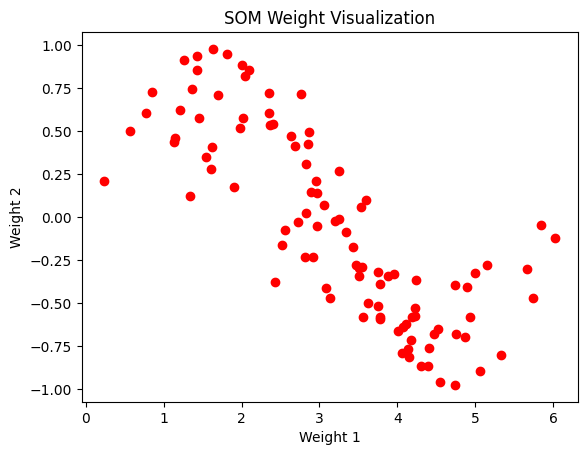

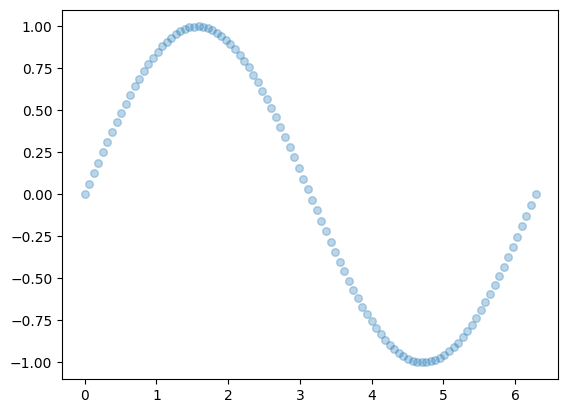

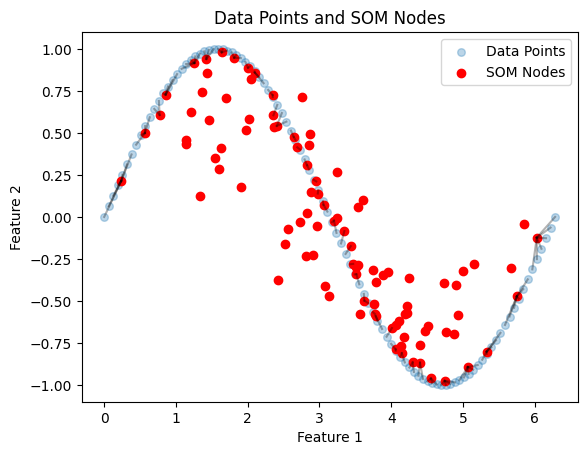

In [ ]:
# SOM 초기화: 10x10 격자, 입력 벡터 크기 2
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)

# 초기화 및 학습
som.random_weights_init(data)
som.train_random(data, 100)

# 학습된 SOM의 가중치 시각화
weights = som.get_weights()

for i in range(10):
    for j in range(10):
        plt.scatter(weights[i, j, 0], weights[i, j, 1], marker='o', color='red')
plt.title('SOM Weight Visualization')
plt.xlabel('Weight 1')
plt.ylabel('Weight 2')
plt.show()

# 입력데이터
plt.scatter(data[:, 0], data[:, 1], s=30, label='Data Points', alpha=0.3)
plt.show()

# 입력 데이터와 SOM 맵핑 결과 시각화
for i, x in enumerate(data):
    winner = som.winner(x)
    plt.plot([x[0], weights[winner[0], winner[1], 0]], [x[1], weights[winner[0], winner[1], 1]], 'k-', alpha=0.3)
plt.scatter(data[:, 0], data[:, 1], s=30, label='Data Points', alpha=0.3)
plt.scatter(weights[:, :, 0], weights[:, :, 1], marker='o', color='red', label='SOM Nodes')
plt.title('Data Points and SOM Nodes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
# prompt: 유튜브를 코드로

!pip install pytube
from pytube import YouTube

# Get the YouTube video URL
video_url = "https://www.youtube.com/watch?v=H9H6s-x-0YE&list=PLd5v0YmZlgWYfFd_Oo0o0YHbFLBOizZLp"

# Create a YouTube object
yt = YouTube(video_url)

# Get the highest resolution video stream
stream = yt.streams.get_highest_resolution()

# Download the video
stream.download()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00


'/content/How SOM (Self Organizing Maps) algorithm works.mp4'